In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
pylab.rcParams['figure.figsize'] = (8, 6)
font = {'size'   : 12}

matplotlib.rc('font', **font)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Problem 1
## Part a
Show the Eddington luminosity of a black hole is $L_{edd}=2\cdot10^{-9}M_{BH}c^2$ yr$^{-1}$

We start with the radiation pressure, which can be easily converted to a radiation force, and the force due to gravity.
$$P_{rad} = \frac{L}{4\pi r^2 c}$$
$$F_{rad} = \sigma_T P_{rad} n_e$$
$$F_{grav} = \frac{GM_{BH}\rho}{r^2}$$

The condition on the Eddington luminosity is that $F_{rad}\leq F_{grav}$. Because the Eddington luminosity is the maximum luminosity, we take the equal part of the less than or equal to in the previous equation. 

$$L_{edd} = 4\pi r^2 c \frac{1}{\sigma_T n_e} \frac{GM_{BH}\rho}{r^2}$$

The following terms cancel out: $r^2$, $\rho$, and $n_e$ (leaving behind an extra factor of $m_p$ the proton mass because $\rho = n_e \cdot m_p$).

Evaluating the constants (which the book does as well) leaves: $$L_{edd} \approx 1.28\cdot 10^{46} \frac{M_{BH}}{10^8 \mathrm{M}_\odot}\textrm{erg s}^{-1}$$
converting ergs to Joules merely changes the power of 10 from 46 to 39. Dividing by $c^2$ leaves:
$$L_{edd} \approx 1.42\cdot 10^{22} \frac{\textrm{kg}}{\textrm{s}}c^2 \frac{M_{BH}}{10^8 \mathrm{M}_\odot}$$
And finally, converting from M$_\odot$ to kg and from s to yr gives the final answer:
$$L_{edd} \approx 2.25\cdot 10^{-9} c^2 \frac{M_{BH}}{\textrm{yr}}$$
## Part b
Assume $L=L_{edd}$ and accreted material radiates 10% of its rest mass as energy.

# Problem 3

The book's definition of the Fourier ellipse modifications is the following:
$$ \Delta(\phi) = r_0 + \sum_{n=0}^{\infty} \left(a_n\sin n\phi + b_n\sin n\phi\right)$$
Where $n$ is the term in the Fourier series, $a_n$ is the amplitude of the cosine term and $b_n$ is the amplitude of the sine term. Usually $a_n$ are all 0 except for $a_4$ and $b_n$ are all zero.

They define $\phi$ as the angle from the x axis to the point on the ellipse. However, when I do that it looks weird, probably because the angle used for generating an ellipse is not the same as the angle that is seen at the end (see the green dot that is *not* at 45$^\circ$):

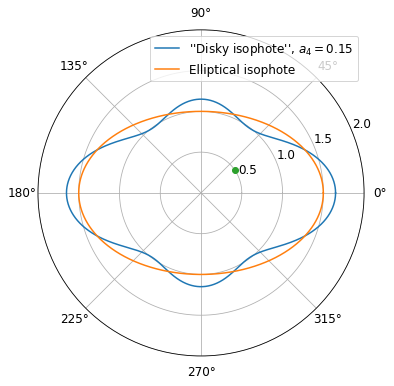

In [57]:
def generateProbablyWrong(a,b,*params):
    """Each param is a tuple of the fourier component and amplitude"""
    t = np.arange(0,2*pi,0.001)
    ellipsex = a*cos(t) 
    ellipsey = b*sin(t)
    r = np.sqrt(ellipsex**2 + ellipsey**2)
    theta = arctan2(ellipsey,ellipsex)
    for tup in params:
        n = tup[0]
        a_n = tup[1]
        b_n = tup[2]
        r = r + a_n * cos(n*theta) + b_n * sin(n*theta)
    return (theta,r)
ellipsex=1.5*cos(pi/4)
ellipsey=1*sin(pi/4)
sample_theta= arctan2(ellipsey,ellipsex)


amplitude = 0.15
theta,r=generateProbablyWrong(1.5,1,(4,amplitude,0))
polar(theta,r,label="''Disky isophote'', $a_4 = {:.2f}$".format(amplitude))
theta,r=generateProbablyWrong(1.5,1)
polar(theta,r,label="Elliptical isophote")
polar(sample_theta,0.5,'o')
legend()
ax=gca()
d=ax.set_rticks([0.5, 1, 1.5, 2])

So instead I used $\phi$ as the ellipse-generating angle (which I called `t` in my code). Also [Bender et al. (1988)](http://adsabs.harvard.edu/abs/1988A%26AS...74..385B) used the elliptical parameter to generate their Fourier decomposition. The slides in class were unclear about which to use.

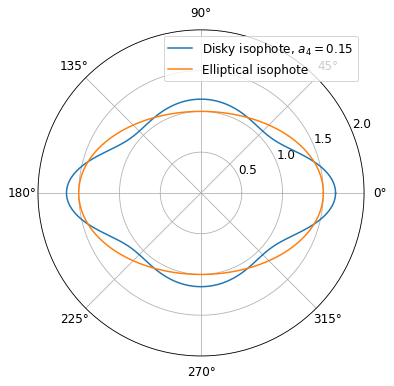

In [54]:
def generateFourierEllipse(a,b,*params):
    """Each param is a tuple of the fourier component and amplitude"""
    t = np.arange(0,2*pi,0.001)
    ellipsex = a*cos(t) 
    ellipsey = b*sin(t)
    r = np.sqrt(ellipsex**2 + ellipsey**2)
    theta = arctan2(ellipsey,ellipsex)
    for tup in params:
        n = tup[0]
        a_n = tup[1]
        b_n = tup[2]
        r = r + a_n * cos(n*t) + b_n * sin(n*t)
    return (theta,r)

amplitude = 0.15
theta,r=generateFourierEllipse(1.5,1,(4,amplitude,0))
polar(theta,r,label="Disky isophote, $a_4 = {:.2f}$".format(amplitude))
theta,r=generateFourierEllipse(1.5,1)
polar(theta,r,label="Elliptical isophote")
legend()
ax=gca()
d=ax.set_rticks([0.5, 1, 1.5, 2])

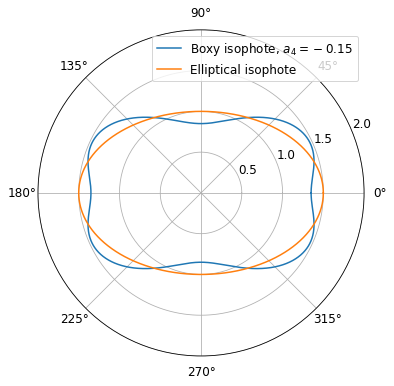

In [55]:
theta,r=generateFourierEllipse(1.5,1,(4,-amplitude,0))
polar(theta,r,label="Boxy isophote, $a_4 = {:.2f}$".format(-amplitude))
theta,r=generateFourierEllipse(1.5,1)
polar(theta,r,label="Elliptical isophote")
legend()
ax=gca()
d=ax.set_rticks([0.5, 1, 1.5, 2])